In [23]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
# warnings.filterwarnings('ignore')

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data = pd.read_sql_query('select * from useducation', con=engine)
engine.dispose()

In [28]:
data1 = data.copy()
columns = data1.columns.drop(['PRIMARY_KEY', 'STATE', 'YEAR'])
years = data['YEAR'].unique()

for year in years:
    for c in columns:
        data1[data1['YEAR']==year][c] = data1[data1['YEAR']==year][c].fillna(data1[data1['YEAR']==year][c].mean())
data1.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

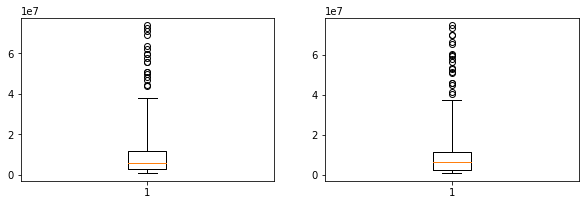

In [70]:
# question1
data1.dropna(inplace=True)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.boxplot(data1['TOTAL_REVENUE'], whis =3)

plt.subplot(1,2,2)
plt.boxplot(data1['TOTAL_EXPENDITURE'], whis =3)
plt.show()

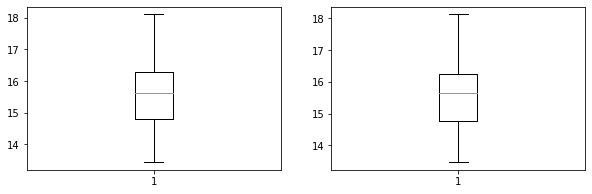

In [69]:
# question2
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.boxplot(np.log(data1['TOTAL_REVENUE']), whis =3)

plt.subplot(1,2,2)
plt.boxplot(np.log(data1['TOTAL_EXPENDITURE']), whis =3)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5d3752320>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5d37529b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5d37c2cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5d3752fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5d37dc3c8>],
 'means': []}

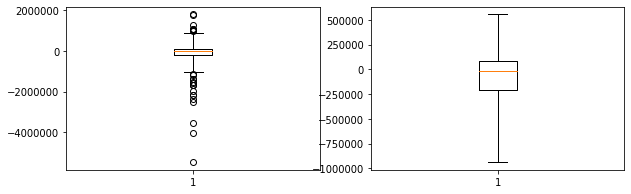

In [108]:
# question3
from scipy.stats.mstats import winsorize
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
budget_dificit = data1['TOTAL_REVENUE'] - data1['TOTAL_EXPENDITURE']
plt.boxplot(budget_dificit, whis = 3)

plt.subplot(1,2,2)
winsorized_budget_1 = winsorize(data1['budget_dificit_1'], (0.05, 0.05))
plt.boxplot(winsorized_budget_1, whis = 3)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5d3a34c18>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5d3a34cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5d3a34668>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5d3a43978>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5d3a43cc0>],
 'means': []}

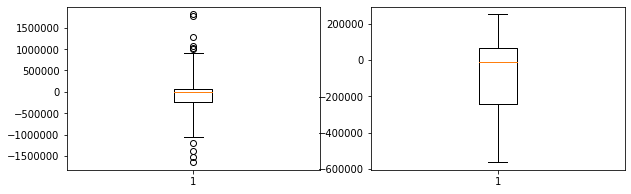

In [109]:
# question 4
winsorized_total_expenditure = winsorize(data1['TOTAL_EXPENDITURE'], (0.1,0.1))
winsorized_total_revenue = winsorize(data1['TOTAL_REVENUE'], (0.1,0.1))

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
budget_dificit_2 = winsorized_total_revenue - winsorized_total_expenditure
plt.boxplot(budget_dificit_2, whis = 3)

plt.subplot(1,2,2)
winsorized_budget_2 = winsorize(data1['budget_dificit_2'], (0.1,0.1))
plt.boxplot(winsorized_budget_2, whis=3)

In [117]:
pd.DataFrame({"original_budget": budget_dificit, "winsorized_budget_1": winsorized_budget,
              "winsorized_budget2": winsorized_budget_2}).describe()

# both mean and median were seen more than 20% between win_1 and win_2, therefore how to eliminate outliers is very important

,original_budget,winsorized_budget_1,winsorized_budget2
count,4.130000e+02,413.000000,413.000000
mean,-1.073359e+05,-73128.285714,-96191.578692
std,6.026989e+05,345241.074194,255240.410751
min,-5.487742e+06,-940187.000000,-563852.000000
25%,-2.051510e+05,-205151.000000,-240203.000000
50%,-1.455000e+04,-14550.000000,-10550.000000
75%,8.356300e+04,83563.000000,68222.000000
max,1.816932e+06,557170.000000,252388.000000


In [ ]:
# the first method is better, cuase the addtion operation in the second method will produce extra noise to the data. So to create
# a variable first then apply the elimination is better way. 